In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
import pandas as pd

data = pd.read_csv('../dataset_seguro_vida.csv')
data.head()

,Salario,Funcao,Idade,Fuma,ProblemasGeneticos,Cidade,Estado,Sexo,PrecoSeguro
0,125186,Bombeiro,56,Não,Não,Curitiba,PR,Masculino,278.2
1,54674,Professor,69,Sim,Não,São Paulo,RS,Feminino,238.0
2,55854,Bombeiro,46,Não,Não,Rio de Janeiro,PR,Feminino,242.0
3,66271,Professor,32,Sim,Não,Porto Alegre,PR,Feminino,164.0
4,93688,Bombeiro,60,Não,Sim,Porto Alegre,RS,Masculino,364.0


In [3]:
data.shape

(1000, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Salario             1000 non-null   int64  
 1   Funcao              1000 non-null   object 
 2   Idade               1000 non-null   int64  
 3   Fuma                1000 non-null   object 
 4   ProblemasGeneticos  1000 non-null   object 
 5   Cidade              1000 non-null   object 
 6   Estado              1000 non-null   object 
 7   Sexo                1000 non-null   object 
 8   PrecoSeguro         1000 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 70.4+ KB


In [5]:
object_columns = data.select_dtypes(include='object').columns

for col in object_columns:
    data[col] = data[col].astype('category')

data.dtypes

Salario                  int64
Funcao                category
Idade                    int64
Fuma                  category
ProblemasGeneticos    category
Cidade                category
Estado                category
Sexo                  category
PrecoSeguro            float64
dtype: object

In [6]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Salario,1000.0,84905.9760,38430.889006,20060.0,51945.5,84699.0,117858.0,149972.0
Idade,1000.0,43.8190,14.991030,18.0,31.0,44.0,56.0,69.0
PrecoSeguro,1000.0,251.4816,72.733486,100.0,198.0,250.0,301.4,438.8


In [7]:
value_based_on_sex = data.groupby("Sexo").mean("PrecoSeguro")
value_based_on_sex

C:\Users\mathe\AppData\Local\Temp\ipykernel_21872\2401225203.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  value_based_on_sex = data.groupby("Sexo").mean("PrecoSeguro")


,Salario,Idade,PrecoSeguro
Sexo,,,
Feminino,84871.202929,42.583682,238.025105
Masculino,84937.818008,44.950192,263.803831


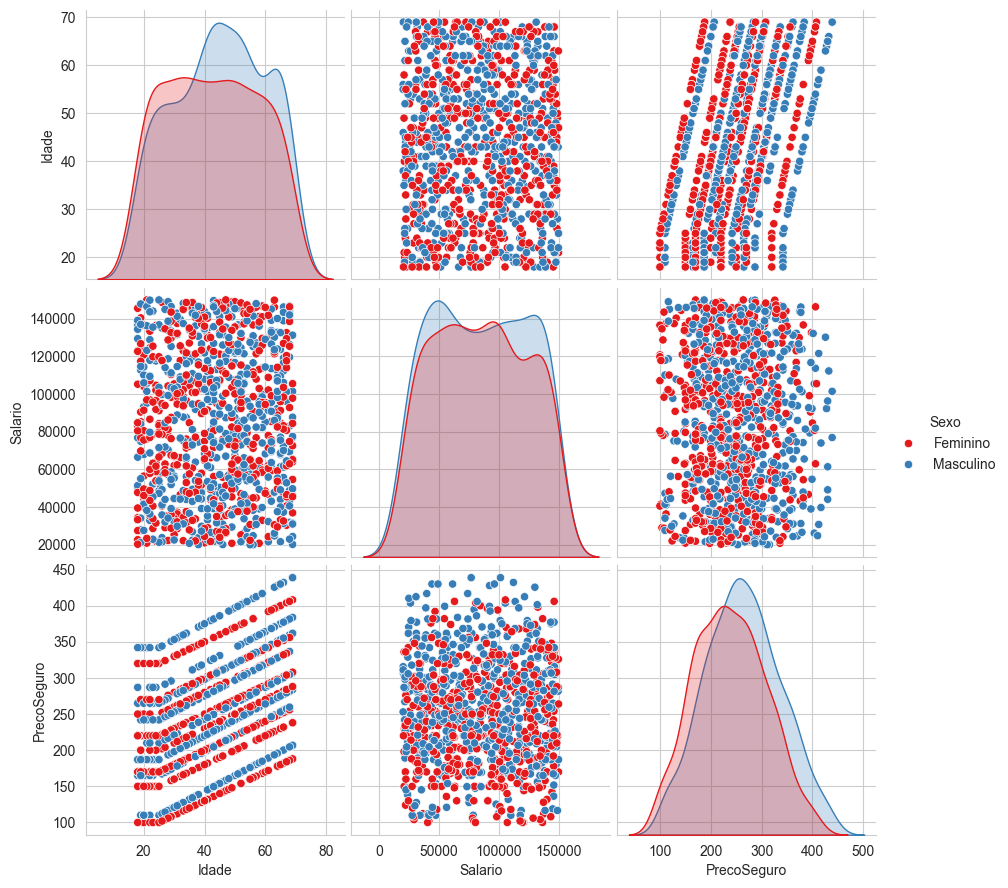

In [8]:
sns.set_style("whitegrid")

sns.pairplot(
    data[["Idade", "Salario", "PrecoSeguro", "Sexo"]],
    hue = "Sexo",
    height = 3,
    palette = "Set1")


<Axes: >

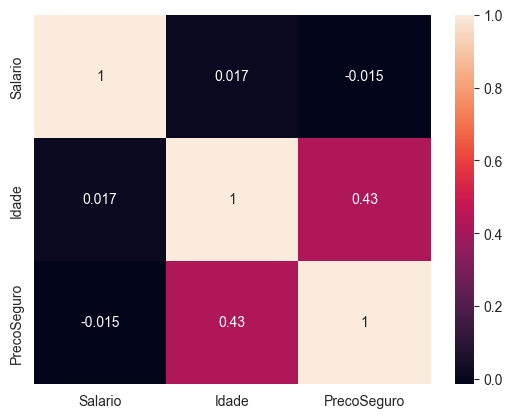

In [9]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot= True)


In [10]:
data = pd.get_dummies(data)
data.columns


Index(['Salario', 'Idade', 'PrecoSeguro', 'Funcao_Advogado', 'Funcao_Bombeiro',
       'Funcao_Engenheiro', 'Funcao_Médico', 'Funcao_Piloto',
       'Funcao_Policial', 'Funcao_Professor', 'Fuma_Não', 'Fuma_Sim',
       'ProblemasGeneticos_Não', 'ProblemasGeneticos_Sim',
       'Cidade_Belo Horizonte', 'Cidade_Curitiba', 'Cidade_Porto Alegre',
       'Cidade_Rio de Janeiro', 'Cidade_São Paulo', 'Estado_MG', 'Estado_PR',
       'Estado_RJ', 'Estado_RS', 'Estado_SP', 'Sexo_Feminino',
       'Sexo_Masculino'],
      dtype='object')

In [11]:
y = data["PrecoSeguro"]
X = data.drop("PrecoSeguro", axis = 1)


In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(
    X,y, 
    train_size = 0.80, 
    random_state = 1)

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

lr.score(X_test, y_test)

0.9972447106859215

In [14]:
lr.score(X_test, y_test)

0.9972447106859215

In [15]:
from sklearn.metrics import mean_squared_error
import math

y_pred = lr.predict(X_test)
math.sqrt(mean_squared_error(y_test, y_pred))


3.6855846806185